In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Logistic regression default

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

Default (with enrolled)
Dropout F1 Score: 0.7925600984645144
Dropout F1 Score var: 0.00013314368919266887
Wilcoxon 0.0006533107814151377
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.79       284
    Enrolled       0.50      0.33      0.40       159
    Graduate       0.80      0.94      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


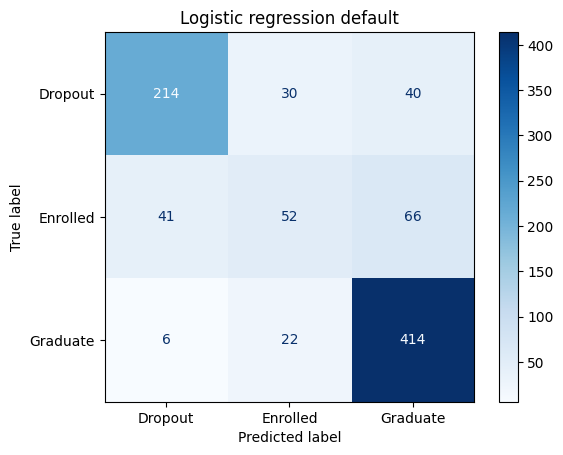

In [18]:
max_iter=10000
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []
for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

print("Default (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred=preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

Default (without enrolled)
Dropout F1 Score: 0.8847802105538215
Dropout F1 Score var: 0.0002298182913285913
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.89      0.80      0.84       284
    Graduate       0.88      0.94      0.91       442

    accuracy                           0.88       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


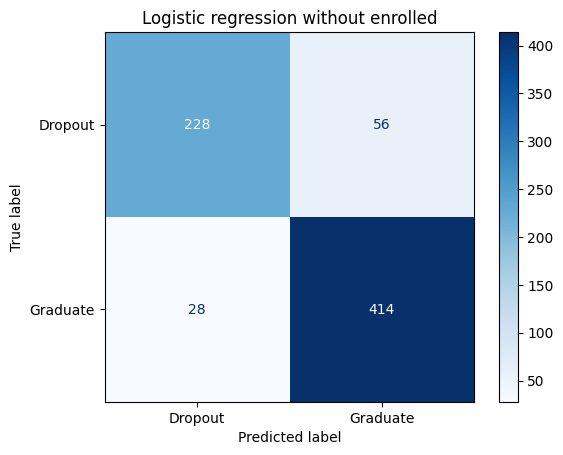

In [19]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)


print("Default (without enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Import RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

Random forest classifier default (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.7969830736843944
Dropout F1 Score var: 0.00016309342239587628
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.81      0.80      0.81       284
    Enrolled       0.61      0.42      0.50       159
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.79       885
   macro avg       0.75      0.71      0.72       885
weighted avg       0.78      0.79      0.78       885



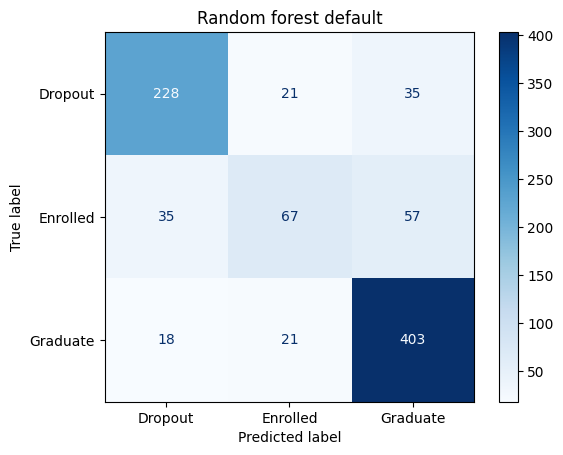

In [21]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    
print("Random forest (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier without enrolled

Random forest (without enrolled)
Dropout F1 Score: 0.8734547934725931
Dropout F1 Score var: 0.000228360963214466
Wilcoxon WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(6.103515625e-05))
              precision    recall  f1-score   support

     Dropout       0.92      0.81      0.86       284
    Graduate       0.88      0.95      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



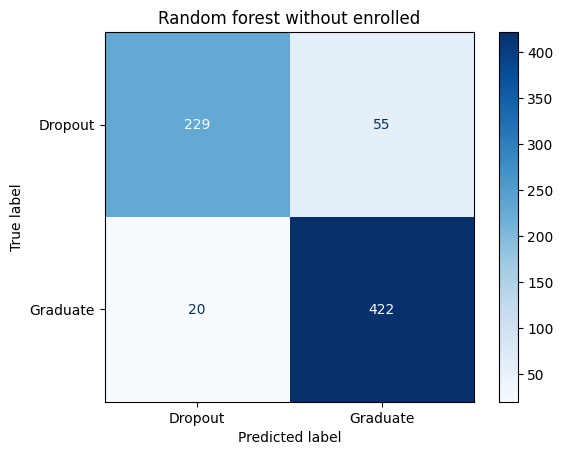

In [ ]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
print("Random forest (without enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled")
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import wilcoxon
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import optuna


In [ ]:
def objective(trial:optuna.Trial):
    transformers = []
    scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

    model = RandomForestClassifier()

    for col in X.columns:
        scaler_choice = trial.suggest_categorical(f"scaler_{col}", list(scaler_options.keys()))
        transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

    col_transformer = ColumnTransformer(transformers)
    steps = [("scaler", col_transformer)]

    # Modelo final
    steps.append(("classifier", model))
    pipe = Pipeline(steps)
    f1_scores = []
    for iteration in range(0, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        pipe.fit(X_train,y_train)
        preds = pipe.predict(X_test)
        f1_score_per_class = f1_score(y_test, preds, average=None)
        dropout_index = le.transform(["Dropout"])[0]
        dropout_f1_score = f1_score_per_class[dropout_index]
        f1_scores.append(dropout_f1_score)
    
    statistic, pvalue = wilcoxon(x=f1_scores)

    trial.set_user_attr("var", np.var(f1_scores))
    trial.set_user_attr("std", np.std(f1_scores))
    trial.set_user_attr("wilcoxon_statistic", statistic)
    trial.set_user_attr("wilcoxon_pvalue", pvalue)
    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize",
                            storage="sqlite:///random_forest_scaler.db",
                            load_if_exists=True)
study.optimize(objective, n_trials=1000)

# Rebuild transformers from study.best_params
transformers = []
scaler_options = {  
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

for key, value in study.best_params.items():
    if key.startswith("scaler_"):
        column_name = key.replace("scaler_", "")
        scaler = scaler_options[value]
        transformers.append((f"{column_name}_scaler", scaler, [column_name]))

col_transformer = ColumnTransformer(transformers)
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled and scaler)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled and scaler")
plt.show()

Próximo passo, aplicar PCA e RFE utilizando como estimator o random forest (com hiperparametros padrões)